# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

I scrap the historical exchange rates between the Singapore Dollar (SGD) and the US Dollar (USD) between 9/4/2020 and 3/3/2021



## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [35]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/SGD/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [128]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Singapore Dollar Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />\n'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [129]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [38]:
print(soup.prettify()[:1045])

<!DOCTYPE html>
<!--[if lt IE 9]>
    <html class="no-js ie8 oldie" lang='en' xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Singapore Dollar Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="C#" name="CODE_LANGUAGE">
   <meta content="JavaScript" name="vs_defaultClientScript"/>
   <meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema"/>
   <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
    <meta content="AP" name="mapping"/>
    <base href="https://www.exchange-rates.org/"/>
    <link href="https://ajax.googleapis.com/" rel="dns-prefetch"/>
    <link href="https://www.google-analytics.com/" rel="dns-prefetch"/>
    <link as="image" href="https://dol8qrceshfrq.cloudfront.ne

In [39]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:1000])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    3/4/2021
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/SGD/3-4-2021">
     1.33714
    </a>
    SGD
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/SGD/3-4-2021">
     USD SGD rate for 3/4/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    3/3/2021
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/Rate/USD/SGD/3-3-2021">
     1.33223
    </a>
    SGD
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/SGD/3-3-2021">
     USD SGD rate for 3/3/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    3/2/2021
   </td>
   <td>
    Tuesday
   </td>
   <td>
    <a href="/Rate/USD/SGD/3-2-2021">
     1.32946
    </a>
    SGD
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/SGD/3-2-2021">
     USD SGD rate for 3/2/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    3/1/2021



In [124]:
tr = table.find_all('tr')
tr
 # just call 2 founded tr

[<tr><td>3/4/2021</td><td>Thursday</td><td><a href="/Rate/USD/SGD/3-4-2021">1.33714</a> SGD</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/SGD/3-4-2021">USD SGD rate for 3/4/2021</a></td></tr>,
 <tr><td>3/3/2021</td><td>Wednesday</td><td><a href="/Rate/USD/SGD/3-3-2021">1.33223</a> SGD</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/SGD/3-3-2021">USD SGD rate for 3/3/2021</a></td></tr>]

In [126]:
temp = []
for row in tr:
    tds = row.find_all('td')
    try:
        date = tds[0].text
        day = tds[1].text
        rate = tds[2].text
        desc = tds[3].text
        temp.append([date , day, rate, desc])
    except:
        pass

temp[:5]

[['3/4/2021', 'Thursday', '1.33714 SGD', 'USD SGD rate for 3/4/2021'],
 ['3/3/2021', 'Wednesday', '1.33223 SGD', 'USD SGD rate for 3/3/2021'],
 ['3/2/2021', 'Tuesday', '1.32946 SGD', 'USD SGD rate for 3/2/2021'],
 ['3/1/2021', 'Monday', '1.32724 SGD', 'USD SGD rate for 3/1/2021'],
 ['2/26/2021', 'Friday', '1.33329 SGD', 'USD SGD rate for 2/26/2021']]

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [127]:
temp = temp[::-1]
temp[:10]

[['9/6/2020', 'Sunday', '1.36471 SGD', 'USD SGD rate for 9/6/2020'],
 ['9/7/2020', 'Monday', '1.36639 SGD', 'USD SGD rate for 9/7/2020'],
 ['9/8/2020', 'Tuesday', '1.36993 SGD', 'USD SGD rate for 9/8/2020'],
 ['9/9/2020', 'Wednesday', '1.36728 SGD', 'USD SGD rate for 9/9/2020'],
 ['9/10/2020', 'Thursday', '1.36989 SGD', 'USD SGD rate for 9/10/2020'],
 ['9/11/2020', 'Friday', '1.36828 SGD', 'USD SGD rate for 9/11/2020'],
 ['9/13/2020', 'Sunday', '1.36768 SGD', 'USD SGD rate for 9/13/2020'],
 ['9/14/2020', 'Monday', '1.36459 SGD', 'USD SGD rate for 9/14/2020'],
 ['9/15/2020', 'Tuesday', '1.36126 SGD', 'USD SGD rate for 9/15/2020'],
 ['9/16/2020', 'Wednesday', '1.35827 SGD', 'USD SGD rate for 9/16/2020']]

Do the scrapping process here (please change this markdown with your explanation)

## Creating data frame & Data wrangling

Put the array into dataframe

In [114]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('date','day','rate','desc'))
df.head()

,date,day,rate,desc
0,9/6/2020,Sunday,1.36471 SGD,USD SGD rate for 9/6/2020
1,9/7/2020,Monday,1.36639 SGD,USD SGD rate for 9/7/2020
2,9/8/2020,Tuesday,1.36993 SGD,USD SGD rate for 9/8/2020
3,9/9/2020,Wednesday,1.36728 SGD,USD SGD rate for 9/9/2020
4,9/10/2020,Thursday,1.36989 SGD,USD SGD rate for 9/10/2020


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:>

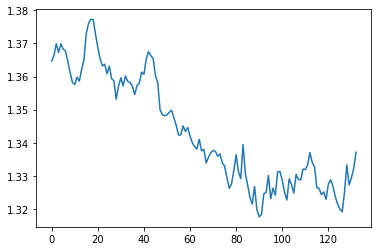

In [123]:
df['rate'] = df['rate'].str.replace("SGD","")
df['rate'] = df['rate'].astype('float64')
df['rate'].plot()

USD has remained relatively stable in the past few weeks after experiencing a sharp decline from 1.38 to 1.32. 
In conclusion, SGD is a stable currency and there is not much movement between the two currencies. However, speculators have to be wary of volality due to economic uncertainty.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.